In [442]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [443]:
df = pd.read_csv('../idena_v1.csv')

df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df

,Date,Open,High,Low,Close,Adj Close,Volume,twitter_followers,reddit_average_posts_48h,reddit_average_comments_48h,reddit_subscribers,reddit_accounts_active_48h,idena_unscaled,idena_monthly,scale,idena
2020-08-11,2020-08-11,0.125496,0.137770,0.124239,0.130634,0.130634,40783,1817.0,0.273,0.000,298,6.666667,0,37.0,0.37,0.00
2020-08-12,2020-08-12,0.130674,0.162275,0.128384,0.138122,0.138122,65517,1829.0,0.182,0.091,300,6.750000,0,37.0,0.37,0.00
2020-08-13,2020-08-13,0.138128,0.138128,0.118348,0.127606,0.127606,41988,2149.0,0.083,0.167,302,6.615385,0,37.0,0.37,0.00
2020-08-14,2020-08-14,0.127084,0.201024,0.121670,0.201024,0.201024,104705,2208.0,0.000,0.000,304,7.083333,34,37.0,0.37,12.58
2020-08-15,2020-08-15,0.201097,0.202423,0.138915,0.162744,0.162744,50419,2267.0,0.100,0.000,307,5.636364,0,37.0,0.37,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-31,2022-01-31,0.083146,0.083205,0.078528,0.081419,0.081419,157240,9584.0,0.091,0.000,925,10.083333,54,30.0,0.30,16.20
2022-02-01,2022-02-01,0.081419,0.085588,0.081330,0.084601,0.084601,149344,9593.0,0.083,0.167,926,10.153846,0,30.0,0.30,0.00
2022-02-02,2022-02-02,0.084601,0.087298,0.081559,0.082081,0.082081,130836,9571.0,0.200,0.100,926,8.727273,0,30.0,0.30,0.00
2022-02-03,2022-02-03,0.082081,0.089960,0.082081,0.088527,0.088527,141869,9549.0,0.200,0.000,925,8.818182,48,30.0,0.30,14.40


In [444]:
future_days = 7

In [445]:
# add new column
df[str(future_days)+'day_price_forecast'] = df[['Close']].shift(-future_days)

df[['Close', str(future_days)+'day_price_forecast']]

,Close,7day_price_forecast
2020-08-11,0.130634,0.250788
2020-08-12,0.138122,0.253025
2020-08-13,0.127606,0.268824
2020-08-14,0.201024,0.291120
2020-08-15,0.162744,0.287222
...,...,...
2022-01-31,0.081419,NaN
2022-02-01,0.084601,NaN
2022-02-02,0.082081,NaN
2022-02-03,0.088527,NaN


In [446]:
#Create X dataset
X = np.array(df[["High", "Low", "Volume", "Open", "twitter_followers", "reddit_average_posts_48h",
                "reddit_average_comments_48h", "reddit_subscribers", "reddit_accounts_active_48h", 'idena_unscaled',
                'idena_monthly', 'scale', 'idena', 'Close']])

X = X[:df.shape[0] - future_days]
print(X)

[[1.37770e-01 1.24239e-01 4.07830e+04 ... 3.70000e-01 0.00000e+00
  1.30634e-01]
 [1.62275e-01 1.28384e-01 6.55170e+04 ... 3.70000e-01 0.00000e+00
  1.38122e-01]
 [1.38128e-01 1.18348e-01 4.19880e+04 ... 3.70000e-01 0.00000e+00
  1.27606e-01]
 ...
 [8.43640e-02 7.74140e-02 2.35304e+05 ... 5.80000e-01 2.03000e+01
  7.89650e-02]
 [8.14630e-02 7.55860e-02 2.46260e+05 ... 5.80000e-01 3.07400e+01
  8.14490e-02]
 [8.33340e-02 7.90770e-02 1.17399e+05 ... 5.80000e-01 1.04400e+01
  8.30210e-02]]


In [447]:
y = np.array(df[str(future_days)+'day_price_forecast'])
y = y[:-future_days]
print(y)

[0.250788 0.253025 0.268824 0.29112  0.287222 0.25967  0.256249 0.237235
 0.226114 0.255959 0.27889  0.270433 0.285196 0.281814 0.288933 0.252189
 0.247463 0.213458 0.215829 0.201781 0.188281 0.179111 0.195198 0.194706
 0.187714 0.182892 0.143976 0.130773 0.141561 0.145338 0.164182 0.18149
 0.181751 0.179018 0.145569 0.138025 0.141171 0.139567 0.133987 0.134377
 0.129535 0.126744 0.126741 0.123904 0.116028 0.114721 0.116636 0.116295
 0.120187 0.124864 0.116993 0.11924  0.120294 0.123378 0.121102 0.129947
 0.124023 0.108435 0.109576 0.095044 0.107073 0.095222 0.100276 0.100151
 0.114585 0.115198 0.108259 0.108077 0.10569  0.104818 0.107484 0.102729
 0.105178 0.096754 0.097656 0.09411  0.092027 0.100985 0.11806  0.117199
 0.114141 0.106572 0.115059 0.119643 0.118467 0.109233 0.119238 0.113289
 0.100523 0.101419 0.104538 0.099101 0.093694 0.100268 0.103303 0.104274
 0.104665 0.103505 0.10497  0.097782 0.0875   0.089985 0.094185 0.103967
 0.108686 0.098272 0.100371 0.094032 0.090621 0.0951

In [448]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, shuffle=False)

In [449]:
from sklearn.preprocessing import StandardScaler


StdS_X = StandardScaler()
StdS_y = StandardScaler()
X_l = StdS_X.fit_transform(x_train)
y_p = StdS_y.fit_transform(y_train.reshape(-1,1))

print("Scaled X_l:")
print(X_l)
print("Scaled y_p:")
print(y_p)

Scaled X_l:
[[-0.07146676  0.0291336  -0.55048614 ... -0.09130363 -0.8581725
  -0.0239117 ]
 [ 0.39709168  0.12773362 -0.11396946 ... -0.09130363 -0.8581725
   0.13830769]
 [-0.06462147 -0.11099975 -0.52921976 ... -0.09130363 -0.8581725
  -0.08951003]
 ...
 [-0.44514714 -0.34675966  0.18720128 ...  0.54583695 -0.01108851
  -0.48517974]
 [-0.43753701 -0.49921503  0.49864342 ...  0.54583695  2.08967981
  -0.54919661]
 [-0.55750174 -0.61836763  1.25727954 ...  0.54583695  1.37812925
  -0.50521886]]
Scaled y_p:
[[ 2.61901864e+00]
 [ 2.66778348e+00]
 [ 3.01218925e+00]
 [ 3.49822449e+00]
 [ 3.41325116e+00]
 [ 2.81263925e+00]
 [ 2.73806414e+00]
 [ 2.32357391e+00]
 [ 2.08114487e+00]
 [ 2.73174237e+00]
 [ 3.23162012e+00]
 [ 3.04726418e+00]
 [ 3.36908596e+00]
 [ 3.29536102e+00]
 [ 3.45054961e+00]
 [ 2.64955934e+00]
 [ 2.54653626e+00]
 [ 1.80525403e+00]
 [ 1.85693996e+00]
 [ 1.55070462e+00]
 [ 1.25641525e+00]
 [ 1.05651647e+00]
 [ 1.40720041e+00]
 [ 1.39647519e+00]
 [ 1.24405510e+00]
 [ 1.1389392

In [450]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C = 1e3, gamma=0.0001)
svr_rbf.fit(X_l, y_p)

C:\Users\nikol\Desktop\SIAP - projekat\SIAP_2022\venv\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1000.0, gamma=0.0001)

In [451]:
svr_rbf_confidence = svr_rbf.score(X_l, y_p)
print('svr_rbf confidence', svr_rbf_confidence)

svr_rbf confidence 0.6272101925468623


In [452]:
X_testic = StdS_X.fit_transform(x_test)
svm_prediction = svr_rbf.predict(X_testic)
print(svm_prediction)

[-6.16789287e-01 -7.84354083e-01 -6.56231201e-01 -6.61959437e-01
 -8.25905572e-01 -7.49963346e-01 -8.22169217e-01 -7.75805293e-01
 -6.90702630e-01 -7.17103698e-01 -8.00111233e-01 -8.36096462e-01
 -6.15560913e-01 -3.14406289e-01 -7.77570442e-01 -5.93751407e-01
 -5.70777585e-01 -6.39256340e-01 -6.28173326e-01 -5.29738566e-01
 -4.86102157e-01 -4.14325492e-01 -4.92983819e-01 -1.09688840e-01
 -1.15975241e-03  5.64678777e-01  7.57333483e-01  1.02567379e+00
  1.45385336e+00  1.56570199e+00  1.27074568e+00  1.44625064e+00
  1.73990502e+00  1.33668827e+00  1.23103557e+00  1.37757745e+00
  9.88425845e-01  9.60235839e-01  1.01321268e+00  8.47194892e-01
  6.64491230e-01  6.78240123e-01  5.80640314e-01  7.65650201e-01
  6.18221349e-01  5.51347901e-01  7.54642271e-01  7.78468935e-01
  7.49623621e-01  7.20124607e-01  7.48829496e-01  4.54743787e-01
  1.85098568e-01  9.55066017e-02  1.94952289e-01  3.71760380e-01
  2.66645355e-01  6.29931766e-02 -1.53159534e-01  4.31050711e-02
  5.63969728e-02 -2.41468

In [453]:
final_res =svm_prediction.reshape(-1,1)
final_res = StdS_y.inverse_transform(final_res)
print(final_res)


[[0.10235108]
 [0.09466435]
 [0.10054176]
 [0.10027898]
 [0.09275825]
 [0.09624196]
 [0.09292965]
 [0.09505651]
 [0.09896044]
 [0.09774934]
 [0.09394152]
 [0.09229076]
 [0.10240743]
 [0.11622236]
 [0.09497553]
 [0.1034079 ]
 [0.10446179]
 [0.10132045]
 [0.10182886]
 [0.10634438]
 [0.10834612]
 [0.11163875]
 [0.10803044]
 [0.12561341]
 [0.13059199]
 [0.15654882]
 [0.16538651]
 [0.17769615]
 [0.19733812]
 [0.20246898]
 [0.18893838]
 [0.19698936]
 [0.21046023]
 [0.19196338]
 [0.18711675]
 [0.1938391 ]
 [0.17598746]
 [0.1746943 ]
 [0.17712452]
 [0.16950875]
 [0.16112754]
 [0.16175825]
 [0.15728103]
 [0.16576803]
 [0.15900499]
 [0.15593729]
 [0.16526306]
 [0.16635607]
 [0.16503284]
 [0.16367962]
 [0.16499641]
 [0.15150575]
 [0.13913626]
 [0.13502639]
 [0.13958828]
 [0.14769904]
 [0.14287707]
 [0.13353489]
 [0.12361927]
 [0.13262256]
 [0.1332323 ]
 [0.11956823]
 [0.12877351]
 [0.13245808]
 [0.1237581 ]
 [0.12007143]
 [0.12192256]
 [0.12024688]
 [0.13443773]
 [0.13473828]
 [0.14376761]
 [0.14

In [454]:
print(y_test)

[0.101565 0.100745 0.099781 0.097707 0.096369 0.103675 0.111446 0.094877
 0.104885 0.102456 0.100415 0.101163 0.106084 0.105497 0.110238 0.107113
 0.120231 0.121955 0.141773 0.145178 0.153243 0.168202 0.170722 0.167073
 0.167064 0.180508 0.162993 0.161209 0.164109 0.148449 0.150761 0.150013
 0.144099 0.140376 0.140984 0.138258 0.145365 0.137012 0.138892 0.14501
 0.143819 0.14198  0.14372  0.145367 0.135216 0.126746 0.124666 0.130011
 0.132412 0.131441 0.122934 0.116543 0.1227   0.12498  0.114646 0.122094
 0.12377  0.116659 0.115223 0.117144 0.114408 0.124943 0.123143 0.12912
 0.127005 0.124774 0.123719 0.124579 0.129716 0.122558 0.116641 0.117279
 0.113121 0.114321 0.113054 0.109236 0.110288 0.104968 0.104755 0.10125
 0.09906  0.101034 0.099697 0.103365 0.107622 0.10405  0.105665 0.104617
 0.104936 0.102172 0.105083 0.100434 0.097451 0.087077 0.077885 0.08091
 0.08087  0.080629 0.078965 0.081449 0.083021 0.084715 0.083146 0.081419
 0.084601 0.082081 0.088527 0.084359]


In [455]:
print(len(final_res))
print(len(y_test))

108
108


In [456]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,twitter_followers,reddit_average_posts_48h,reddit_average_comments_48h,reddit_subscribers,reddit_accounts_active_48h,idena_unscaled,idena_monthly,scale,idena,7day_price_forecast
2020-08-11,2020-08-11,0.125496,0.137770,0.124239,0.130634,0.130634,40783,1817.0,0.273,0.000,298,6.666667,0,37.0,0.37,0.00,0.250788
2020-08-12,2020-08-12,0.130674,0.162275,0.128384,0.138122,0.138122,65517,1829.0,0.182,0.091,300,6.750000,0,37.0,0.37,0.00,0.253025
2020-08-13,2020-08-13,0.138128,0.138128,0.118348,0.127606,0.127606,41988,2149.0,0.083,0.167,302,6.615385,0,37.0,0.37,0.00,0.268824
2020-08-14,2020-08-14,0.127084,0.201024,0.121670,0.201024,0.201024,104705,2208.0,0.000,0.000,304,7.083333,34,37.0,0.37,12.58,0.291120
2020-08-15,2020-08-15,0.201097,0.202423,0.138915,0.162744,0.162744,50419,2267.0,0.100,0.000,307,5.636364,0,37.0,0.37,0.00,0.287222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-31,2022-01-31,0.083146,0.083205,0.078528,0.081419,0.081419,157240,9584.0,0.091,0.000,925,10.083333,54,30.0,0.30,16.20,NaN
2022-02-01,2022-02-01,0.081419,0.085588,0.081330,0.084601,0.084601,149344,9593.0,0.083,0.167,926,10.153846,0,30.0,0.30,0.00,NaN
2022-02-02,2022-02-02,0.084601,0.087298,0.081559,0.082081,0.082081,130836,9571.0,0.200,0.100,926,8.727273,0,30.0,0.30,0.00,NaN
2022-02-03,2022-02-03,0.082081,0.089960,0.082081,0.088527,0.088527,141869,9549.0,0.200,0.000,925,8.818182,48,30.0,0.30,14.40,NaN


In [457]:
print(y_test)

[0.101565 0.100745 0.099781 0.097707 0.096369 0.103675 0.111446 0.094877
 0.104885 0.102456 0.100415 0.101163 0.106084 0.105497 0.110238 0.107113
 0.120231 0.121955 0.141773 0.145178 0.153243 0.168202 0.170722 0.167073
 0.167064 0.180508 0.162993 0.161209 0.164109 0.148449 0.150761 0.150013
 0.144099 0.140376 0.140984 0.138258 0.145365 0.137012 0.138892 0.14501
 0.143819 0.14198  0.14372  0.145367 0.135216 0.126746 0.124666 0.130011
 0.132412 0.131441 0.122934 0.116543 0.1227   0.12498  0.114646 0.122094
 0.12377  0.116659 0.115223 0.117144 0.114408 0.124943 0.123143 0.12912
 0.127005 0.124774 0.123719 0.124579 0.129716 0.122558 0.116641 0.117279
 0.113121 0.114321 0.113054 0.109236 0.110288 0.104968 0.104755 0.10125
 0.09906  0.101034 0.099697 0.103365 0.107622 0.10405  0.105665 0.104617
 0.104936 0.102172 0.105083 0.100434 0.097451 0.087077 0.077885 0.08091
 0.08087  0.080629 0.078965 0.081449 0.083021 0.084715 0.083146 0.081419
 0.084601 0.082081 0.088527 0.084359]


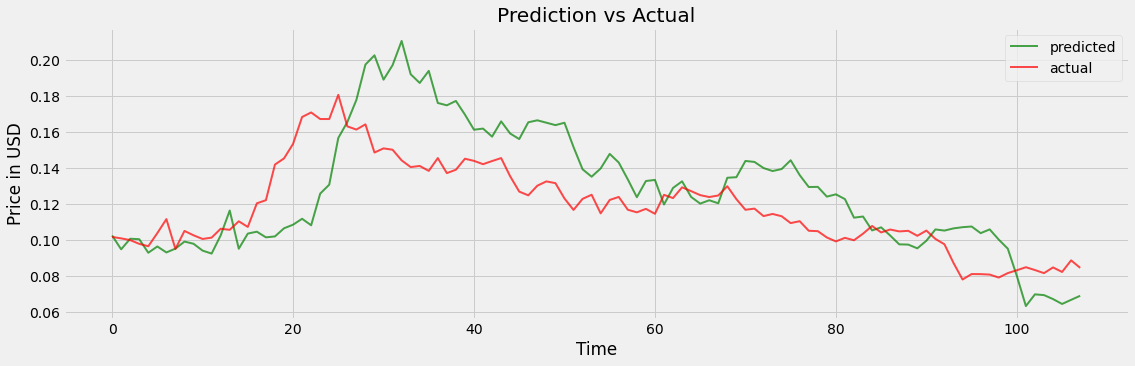

In [458]:
plt.figure(figsize=(17,5))
plt.plot(final_res, label='Prediction', lw=2, alpha =.7, color = "green")
plt.plot(y_test, label='Actual', lw=2, alpha =.7, color = "red")
plt.legend(['predicted', "actual"])
plt.title('Prediction vs Actual')
plt.ylabel('Price in USD')
plt.xlabel('Time')

plt.show()

In [459]:
from math import sqrt
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(mean_absolute_error(y_test,final_res))

print(sqrt(mean_squared_error(y_test, final_res)))


0.020626958727012572
0.02559785471971644
